## Neural networks for approximating functions
This notebook is intended as a practice ground to learn how to use neural networks for approximating functions, are NNs are universal.

In [46]:
# import libraries
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.metrics import r2_score

In [47]:
# define function(s)
f_poly = lambda x: 3*x**3*np.sin(x) + 2*x**2 + x
f_sin = lambda x: np.sin(x)
f_abs = lambda x: abs(x)

#define analytical derivatives
f_der_sin = lambda x: np.cos(x)

In [48]:
# create training and test set with the function
function = f_sin
derivative = f_der_sin
n_samples = 100
x_min = -10
x_max = 10
collocation_points = np.linspace(x_min, x_max, num=n_samples)

samples = np.empty([n_samples, 2])
for i, x in enumerate(collocation_points):
    samples[i, 0] = x
    samples[i, 1] = function(x)
np.random.shuffle(samples) # Shuffle the samples in-place
split_index = int(n_samples * 0.8) # define train/test split
train_x_np = samples[:split_index, 0]
train_y_np = samples[:split_index, 1]
test_x_np = samples[split_index:, 0]
test_y_np = samples[split_index:, 1]

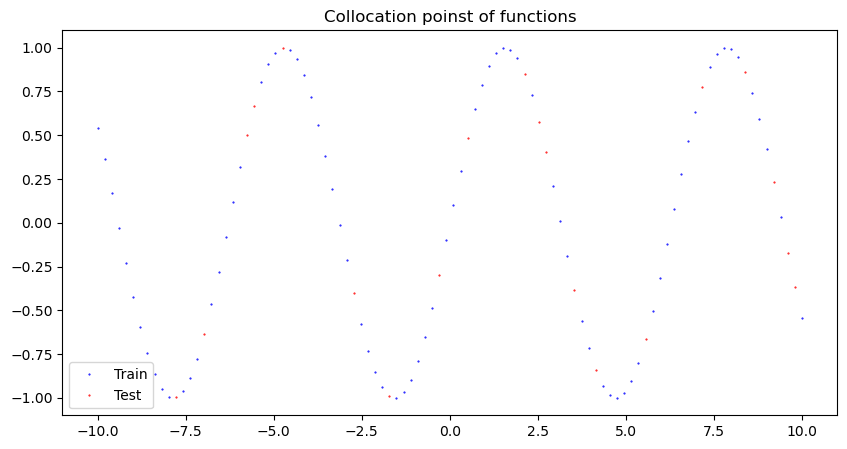

In [49]:
# plot training and test set
plt.figure(figsize=(10, 5))
plt.plot(train_x_np, train_y_np, color = "blue", marker='o', linestyle='none', markersize=0.5)
plt.plot(test_x_np, test_y_np, color = "red", marker='o', linestyle='none', markersize=0.5)
plt.title("Collocation poinst of functions")
plt.legend(["Train", "Test"], loc="lower left")

In [50]:
#Change numpy array to tensor
train_x = torch.from_numpy(train_x_np).unsqueeze(1).float()
train_y = torch.from_numpy(train_y_np).unsqueeze(1).float()
test_x = torch.from_numpy(test_x_np).unsqueeze(1).float()
test_y = torch.from_numpy(test_y_np).unsqueeze(1).float()

#train_x.requires_grad = True
#train_y.requires_grad = True
#test_x.requires_grad = True
#test_y.requires_grad = True

In [51]:
# define network architecture
input_dim = 1
output_dim = 1
num_hidden = 300

class Net(nn.Module):
    def __init__(self, num_hidden):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_dim, num_hidden),
            nn.ReLU(),
            nn.Linear(num_hidden, num_hidden),
            nn.ReLU(),
            nn.Linear(num_hidden, output_dim),
        )

    def forward(self, x):
        y_out = self.linear_relu_stack(x)
        return y_out
    
net = Net(num_hidden)
    
# hyperparameters
learning_rate = 1e-5
batch_size = 20
num_epochs = 10000

#loss
loss_fn = nn.MSELoss()

#optimizer
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

Epoch  1 : Train Loss 0.161019 , Train r2 -0.549476, Test r2 -0.377859
Epoch 51 : Train Loss 0.085919 , Train r2 0.118415, Test r2 0.073753
Epoch 101 : Train Loss 0.081115 , Train r2 0.167467, Test r2 0.115784
Epoch 151 : Train Loss 0.077658 , Train r2 0.202956, Test r2 0.143344
Epoch 201 : Train Loss 0.074673 , Train r2 0.233612, Test r2 0.166074
Epoch 251 : Train Loss 0.071846 , Train r2 0.262643, Test r2 0.186961
Epoch 301 : Train Loss 0.069131 , Train r2 0.290561, Test r2 0.206982
Epoch 351 : Train Loss 0.066543 , Train r2 0.317143, Test r2 0.226018
Epoch 401 : Train Loss 0.064061 , Train r2 0.342646, Test r2 0.243923
Epoch 451 : Train Loss 0.061694 , Train r2 0.366966, Test r2 0.261169
Epoch 501 : Train Loss 0.059430 , Train r2 0.390239, Test r2 0.277825
Epoch 551 : Train Loss 0.057301 , Train r2 0.412087, Test r2 0.293193
Epoch 601 : Train Loss 0.055301 , Train r2 0.432636, Test r2 0.307447
Epoch 651 : Train Loss 0.053420 , Train r2 0.451951, Test r2 0.320605
Epoch 701 : Train Lo

Epoch 5801 : Train Loss 0.014307 , Train r2 0.853594, Test r2 0.777499
Epoch 5851 : Train Loss 0.014066 , Train r2 0.856072, Test r2 0.781722
Epoch 5901 : Train Loss 0.013822 , Train r2 0.858582, Test r2 0.785807
Epoch 5951 : Train Loss 0.013576 , Train r2 0.861099, Test r2 0.790056
Epoch 6001 : Train Loss 0.013330 , Train r2 0.863629, Test r2 0.794110
Epoch 6051 : Train Loss 0.013080 , Train r2 0.866190, Test r2 0.798408
Epoch 6101 : Train Loss 0.012833 , Train r2 0.868726, Test r2 0.802430
Epoch 6151 : Train Loss 0.012588 , Train r2 0.871243, Test r2 0.806354
Epoch 6201 : Train Loss 0.012348 , Train r2 0.873699, Test r2 0.811006
Epoch 6251 : Train Loss 0.012112 , Train r2 0.876120, Test r2 0.815261
Epoch 6301 : Train Loss 0.011882 , Train r2 0.878482, Test r2 0.819376
Epoch 6351 : Train Loss 0.011654 , Train r2 0.880823, Test r2 0.823562
Epoch 6401 : Train Loss 0.011431 , Train r2 0.883115, Test r2 0.827358
Epoch 6451 : Train Loss 0.011211 , Train r2 0.885373, Test r2 0.831211
Epoch 

(Text(0.5, 0, 'Updates'), Text(0, 0.5, 'R2'))

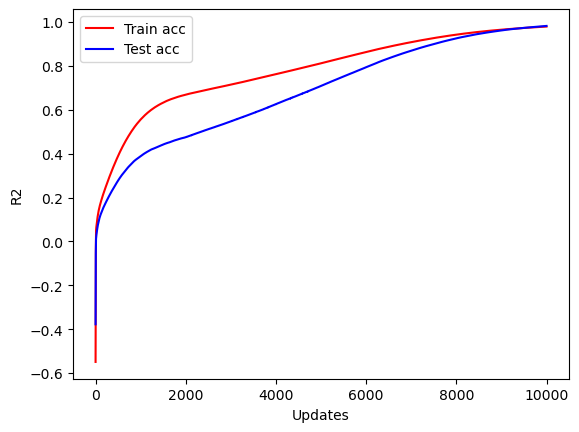

In [52]:
# train network

#getting epoch sizes
num_samples_train = train_x.shape[0]
num_batches_train = num_samples_train // batch_size
num_samples_test = test_x.shape[0]
num_batches_test = num_samples_test // batch_size

# setting up lists for handling loss/accuracy
train_acc, train_loss = [], []
test_acc, test_loss = [], []
cur_loss = 0
losses = []

get_slice = lambda i, size: range(i * size, (i + 1) * size) #get slices for each batch

for epoch in range(num_epochs):
    # Forward -> Backprob -> Update params
    ## Train
    cur_loss = 0
    net.train()
    for i in range(num_batches_train):
        optimizer.zero_grad()
        slce = get_slice(i, batch_size)
        output = net(train_x[slce])

        # compute gradients given loss
        y_batch = train_y[slce]
        batch_loss = loss_fn(output, y_batch)
        batch_loss.backward()
        optimizer.step()

        cur_loss += batch_loss
    losses.append(cur_loss / batch_size)

    net.eval()
    ### Evaluate training
    train_preds, train_targs = [], []
    for i in range(num_batches_train):
        slce = get_slice(i, batch_size)
        output = net(train_x[slce])

        preds = output.squeeze(1)

        train_targs += list(train_y[slce].numpy())
        train_preds += list(preds.data.numpy())

    ### Evaluate test
    test_preds, test_targs = [], []
    for i in range(num_batches_test):
        slce = get_slice(i, batch_size)

        output = net(test_x[slce])
        preds = output.squeeze(1)
        test_targs += list(test_y[slce].numpy())
        test_preds += list(preds.data.numpy())


    train_r2 = r2_score(train_targs, train_preds)
    test_r2 = r2_score(test_targs, test_preds)

    train_acc.append(train_r2)
    test_acc.append(test_r2)

    if epoch % 50 == 0:
        print("Epoch %2i : Train Loss %f , Train r2 %f, Test r2 %f" % (
                epoch+1, losses[-1], train_r2, test_r2))

epoch = np.arange(len(train_acc))
plt.figure()
plt.plot(epoch, train_acc, 'r', epoch, test_acc, 'b')
plt.legend(['Train acc','Test acc'])
plt.xlabel('Updates'), plt.ylabel('R2')

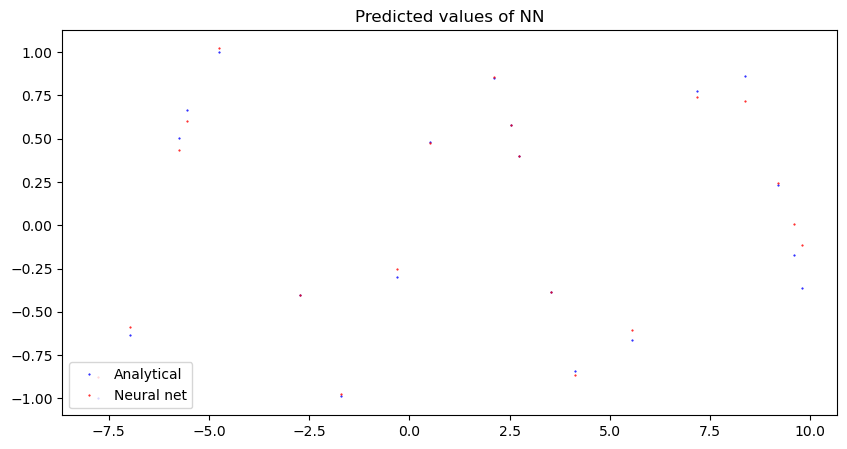

In [53]:
 # evaluate network at different points, show results
test_x.requires_grad = True
test_y_eval = net(test_x) #predictes y values of test set of the trained model
test_y_eval_np = test_y_eval.detach().numpy() #converts it to numpy array

# plot analytical solution vs predicted values of test set
plt.figure(figsize=(10, 5))
plt.plot(test_x_np, test_y_np, color = "blue", marker='o', linestyle='none', markersize=0.5)
plt.plot(test_x_np, test_y_eval_np, color = "red", marker='o', linestyle='none', markersize=0.5)
plt.title("Predicted values of NN")
plt.legend(["Analytical", "Neural net"], loc="lower left")

In [54]:
# compute derivatives
computed_der = torch.autograd.grad(test_y_eval, test_x, grad_outputs=torch.ones_like(test_y_eval))[0]

In [55]:
analytical_der = np.empty([len(test_x)])
for i, x in enumerate(test_x_np):
    analytical_der[i] = derivative(x)

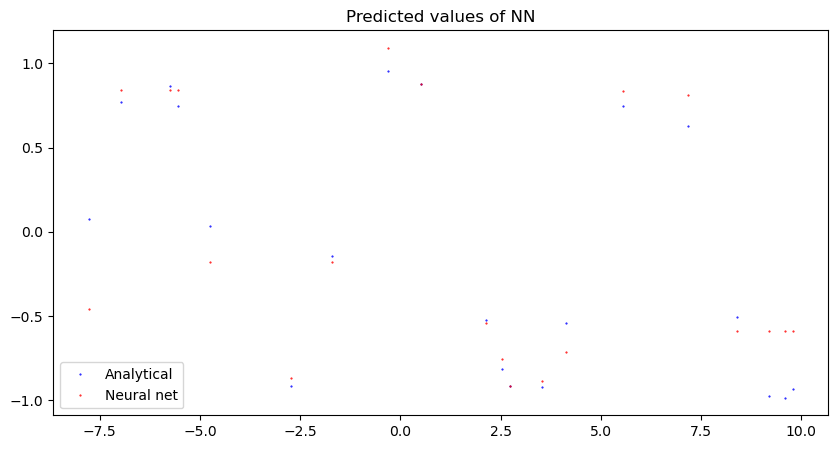

In [56]:
# plot analytical solution vs predicted values of derivatives
plt.figure(figsize=(10, 5))
plt.plot(test_x_np, analytical_der, color = "blue", marker='o', linestyle='none', markersize=0.5)
plt.plot(test_x_np, computed_der.detach().numpy(), color = "red", marker='o', linestyle='none', markersize=0.5)
plt.title("Predicted values of NN")
plt.legend(["Analytical", "Neural net"], loc="lower left")